In [ ]:
Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

In [ ]:
Fixed Acidity: Represents the amount of non-volatile acids in the wine. Acids contribute to the overall taste and structure of the wine.

Volatile Acidity: Refers to the amount of volatile acids in the wine. Too much volatile acidity can lead to unpleasant flavors and aromas.

Citric Acid: Adds freshness and flavor to the wine. It is a naturally occurring acid found in citrus fruits.

Residual Sugar: The amount of sugar remaining after fermentation. This can influence the sweetness of the wine.

Chlorides: Represents the amount of salt in the wine. Too much chloride can give a salty taste, affecting the overall balance.

Free Sulfur Dioxide: Acts as an antioxidant and antimicrobial agent. It helps preserve the wine and prevent undesirable reactions.

Total Sulfur Dioxide: The total amount of sulfur dioxide present in the wine, including both free and bound forms. Sulfur dioxide is added to wine to prevent spoilage.

Density: Represents the density of the wine, which is related to the alcohol content.

pH: Indicates the acidity or basicity of the wine. pH levels influence the taste and stability of the wine.

Sulphates: Presence of sulphates, which can contribute to the wine's aroma and act as antioxidants.

Alcohol: The alcohol content of the wine, which can influence the overall taste and body.

These features are crucial for predicting wine quality because they provide information about the chemical composition of the wine, which directly impacts its taste, aroma, and overall quality. For example, too much or too little acidity, the presence of off-flavors, or imbalances in sugar and alcohol levels can significantly affect the perceived quality of the wine. Analyzing these features allows for the development of models that can predict the quality of wines based on their chemical characteristics.

In [1]:
## Import necessary libraries
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

## Load the wine quality dataset
wine_data = pd.read_csv('WineQT.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
## Seperating X and Y
X = wine_data.drop(labels=['Id','quality'],axis=1)
Y = wine_data[['quality']]

In [4]:
## Feature Importance with Mutual Info
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X,Y.values.flatten(),random_state=21)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mi_scores(scores):
    """
    Defining feature importance function to plot MFI Scores
    """
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

alcohol                 0.194704
volatile acidity        0.093353
sulphates               0.091730
total sulfur dioxide    0.074248
citric acid             0.068039
density                 0.062039
fixed acidity           0.056103
free sulfur dioxide     0.029537
pH                      0.018683
chlorides               0.018668
residual sugar          0.011544
Name: MI Scores, dtype: float64


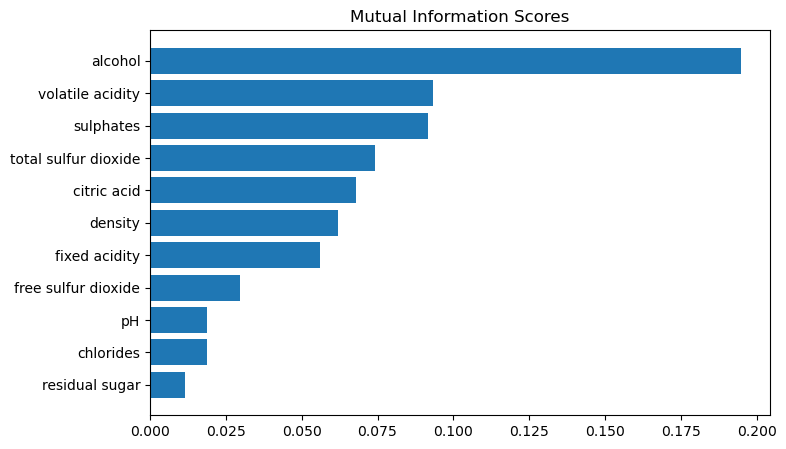

In [6]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
### Observations : Alcohol, Volatile Acidity and Sulphates are top 3 features in the dataset

In [ ]:
Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

In [7]:
# Reading Red Wine Dataset from UCI
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url,sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Check Missing Values in dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
### Observation : Wine Quality does not have missing values in the dataset

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
# Example of SimpleImputer with Mean Strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Seperating Target and Independent Variables
X = df.drop(labels=['quality'],axis=1)
Y = df[['quality']]
df_imputed = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)
df_imputed.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [11]:
# Example of SimpleImputer with Median Strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# Seperating Target and Independent Variables
X = df.drop(labels=['quality'],axis=1)
Y = df[['quality']]
df_imputed = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)
df_imputed.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
### Missing data is a common problem in real-world datasets, and handling missing data is an important step in the data preprocessing and feature engineering process. Here are some common techniques for handling missing data:

1. `Mean/median imputation`: In this technique, missing values are replaced with the mean or median value of the corresponding feature. This technique is simple and easy to implement, and can work well if the missing values are not too numerous. However, it can also introduce bias if the missing values are not missing at random, and it can reduce the variance of the data.

2. `Mode imputation`: In this technique, missing values are replaced with the mode value of the corresponding feature. This technique works well for categorical variables and can be useful if the most common value is a good approximation of the missing value. However, it can also introduce bias if the missing values are not missing at random.

3. `K-nearest neighbor imputation`: In this technique, missing values are replaced with the values of the nearest k-neighbors in the dataset. This method can work well if the missing data is not too extensive and the dataset has a clear underlying structure. However, it can also introduce bias if the nearest neighbors are not truly similar.

4. `Iterative imputation`: In this technique, missing values are imputed by modeling the missing values as a function of other variables in the dataset. Multiple iterations are performed to refine the imputed values, with each iteration using the imputed values from the previous iteration as input. This technique can be effective if the missing data is not too extensive and can be modeled using other variables in the dataset. It can also provide a measure of uncertainty for the imputed values. However, it can be computationally expensive and requires a good understanding of the underlying data structure.

### In general, the choice of imputation technique depends on the nature and extent of the missing data, as well as the characteristics of the dataset. It is important to carefully consider the advantages and disadvantages of each technique before choosing an approach.

In [ ]:
Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

In [12]:
import pandas as pd
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [ ]:
### My approach to analyzing factors that affect students' performance in exams as follows:

1. `Gender`: Previous research has shown that gender can impact students' academic performance. We could analyze the relationship between gender and exam performance using a t-test or ANOVA to compare the mean exam scores of male and female students.

2. `Race/ethnicity`: Similar to gender, race/ethnicity can also impact students' academic performance. We could analyze the relationship between race/ethnicity and exam performance using a similar approach as for gender.

3. `Parental level of education`: Students whose parents have a higher level of education may have better study habits and support systems that contribute to their academic success. You could analyze the relationship between parental level of education and exam performance using a correlation analysis or multiple regression.

4. `Lunch`: Students who receive free or reduced-price lunches may face additional challenges that impact their academic performance. We could analyze the relationship between lunch status and exam performance using a t-test or ANOVA to compare the mean exam scores of students who receive free or reduced-price lunches versus those who do not.

5. `Test preparation course`: Students who take test preparation courses may perform better on exams due to improved study strategies and test-taking skills. You could analyze the relationship between test preparation course enrollment and exam performance using a t-test or ANOVA to compare the mean exam scores of students who took the course versus those who did not.

6. `Math, reading, and writing scores`: These three variables represent the individual subject scores of students on their exams. We could analyze the relationship between these variables and exam performance using correlation analyses or multiple regression.

7. `Total score`: This variable represents the combined score of all three subjects on the exam. We could analyze the relationship between total score and the other variables using a multiple regression.

### Overall, there are a variety of statistical techniques that could be used to analyze the factors that impact students' performance on exams, including t-tests, ANOVAs, correlation analyses, and multiple regression. The choice of technique(s) would depend on the research questions and the specific variables of interest.

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# printing top 5 rows of Student Performance dataset
print('Top 5 rows of Student Performance Dataset')
print(df.head())
print('\n==========================================================================\n')

# Define categorical columns with target
cat_cols = list(df.select_dtypes(include='object').columns)
new_cols = cat_cols + ['total_score']

# Define the model formula
model_formula = "total_score ~ C(gender) + C(race_ethnicity) +  C(parental_level_of_education) +C(lunch) + C(test_preparation_course) "

# Fit the model using OLS regression
model = ols(model_formula, df[new_cols]).fit()

print("ANOVA Table:")
print(anova_lm(model,typ=2))

Top 5 rows of Student Performance Dataset
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  
0          218  
1          247  
2          278  
3          148  
4          229  




PatsyError: Error evaluating factor: NameError: name 'test_preparation_course' is not defined
    total_score ~ C(gender) + C(race_ethnicity) +  C(parental_level_of_education) +C(lunch) + C(test_preparation_course)
                                                                                              ^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
### Assuming alpha = 0.05
### All Variables in above have p-value < 0.05
### Hence we reject the null hypothesis.
### Conclusion : Total Score is dependent on Gender, Race Ethnicity , parental level of education, lunch and test preperation score

In [ ]:
## For Numerical variables i can perform correlation analysis

In [16]:
stud_corr = df.corr(numeric_only=True)
stud_corr

,math score,reading score,writing score,total_score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total_score,0.918746,0.970331,0.965667,1.000000


<AxesSubplot: >

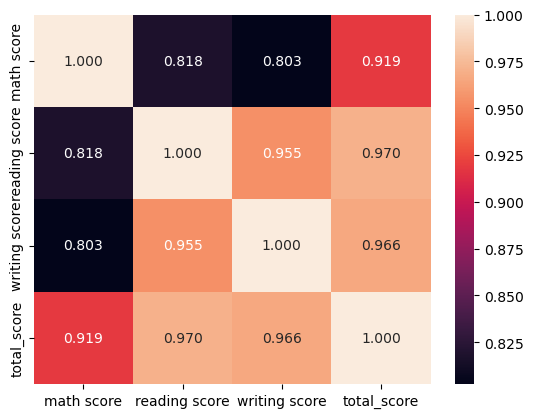

In [17]:
import seaborn as sns
sns.heatmap(stud_corr,annot=True,fmt='.3f')

In [ ]:
Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

In [ ]:
### Feature engineering is the process of selecting and transforming variables in order to improve the performance of a machine learning model. In the context of the student performance dataset, feature engineering would involve selecting and transforming the variables in order to predict students' performance on exams.

### Here are the steps that could be taken for feature engineering in the context of the student performance dataset:

1. `Data cleaning`: Before feature engineering can begin, the data should be cleaned to remove any missing values, inconsistencies, or outliers. This could involve imputing missing values, correcting errors, and removing outliers.

2. `Feature selection`: The next step is to select the variables that are most relevant for predicting exam performance. This could involve examining the correlation between each variable and the target variable (total score), as well as considering domain knowledge and previous research. For example, variables such as math score, reading score, writing score, and test preparation course may be highly relevant for predicting exam performance.

3. `Feature transformation`: Once the relevant variables have been selected, they may need to be transformed in order to improve their predictive power. This could involve creating new variables from existing ones, such as calculating the average of the math, reading, and writing scores, or creating a binary variable to indicate whether or not a student completed a test preparation course. Other transformations could include scaling or standardizing the variables to ensure that they are on the same scale.

4. `Feature engineering iterations`: The feature engineering process is often an iterative one, where the data scientist goes back and forth between selecting and transforming variables until the model performance is optimized. This may involve trying different transformations, selecting different variables, or even collecting additional data.

### Overall, the goal of feature engineering in the context of the student performance dataset would be to create a set of variables that accurately predict students' performance on exams. This would involve selecting relevant variables, transforming them as needed, and iteratively refining the feature set until the model performance is optimized.

In [18]:
import pandas as pd
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
# Checking Missing values in dataset
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [20]:
# Checking duplicates in dataset 
df.duplicated().sum()

0

In [22]:
# Feature Engineering : Adding Total Score column and Average in dataset
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
# Assuming Average score as Target Variable defining X and Y
X = df.drop(labels=['math score','reading score','writing score','total_score','average'],axis=1)
Y = df[['average']]

In [25]:
# Seperating Categorical and Numerical features
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)
print(f'Categorical Columns : {cat_cols}')
print(f'Numerical Columns : {num_cols}')

Categorical Columns : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Columns : []


In [26]:
# One Hot Encoding of Categorical Variables 
X_cat = pd.get_dummies(X[cat_cols])
X_cat.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [27]:
# Train Test split on dataset
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_cat, Y, test_size=0.2, random_state=42)

In [28]:
xtrain.shape

(800, 17)

In [29]:
xtest.shape

(200, 17)

In [30]:
# Perform Standard Scaler on Entire dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [31]:
xtrain.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.948808,-0.948808,-0.307232,-0.486288,-0.693889,1.720580,-0.411814,-0.536884,-0.369274,-0.498046,4.002659,-0.542677,-0.454573,-0.727761,0.727761,-0.731785,0.731785
1,0.948808,-0.948808,-0.307232,-0.486288,1.441153,-0.581199,-0.411814,-0.536884,2.708013,-0.498046,-0.249834,-0.542677,-0.454573,1.374077,-1.374077,1.366522,-1.366522
2,0.948808,-0.948808,-0.307232,-0.486288,-0.693889,1.720580,-0.411814,-0.536884,-0.369274,-0.498046,-0.249834,1.842717,-0.454573,1.374077,-1.374077,-0.731785,0.731785
3,-1.053953,1.053953,-0.307232,-0.486288,1.441153,-0.581199,-0.411814,-0.536884,-0.369274,-0.498046,4.002659,-0.542677,-0.454573,1.374077,-1.374077,-0.731785,0.731785
4,-1.053953,1.053953,-0.307232,-0.486288,-0.693889,-0.581199,2.428282,-0.536884,-0.369274,2.007846,-0.249834,-0.542677,-0.454573,-0.727761,0.727761,-0.731785,0.731785


In [32]:
xtest.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.948808,-0.948808,-0.307232,-0.486288,1.441153,-0.581199,-0.411814,1.862599,-0.369274,-0.498046,-0.249834,-0.542677,-0.454573,-0.727761,0.727761,-0.731785,0.731785
1,0.948808,-0.948808,-0.307232,2.056394,-0.693889,-0.581199,-0.411814,-0.536884,-0.369274,-0.498046,-0.249834,1.842717,-0.454573,1.374077,-1.374077,1.366522,-1.366522
2,-1.053953,1.053953,-0.307232,-0.486288,-0.693889,1.720580,-0.411814,-0.536884,2.708013,-0.498046,-0.249834,-0.542677,-0.454573,-0.727761,0.727761,-0.731785,0.731785
3,-1.053953,1.053953,-0.307232,-0.486288,1.441153,-0.581199,-0.411814,-0.536884,-0.369274,-0.498046,-0.249834,1.842717,-0.454573,1.374077,-1.374077,-0.731785,0.731785
4,-1.053953,1.053953,-0.307232,-0.486288,-0.693889,-0.581199,2.428282,-0.536884,-0.369274,-0.498046,-0.249834,1.842717,-0.454573,-0.727761,0.727761,1.366522,-1.366522


In [ ]:
Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [33]:
# Reading Red Wine Dataset from UCI
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url,sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
# Checking Missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
# Checking Duplicated Values
df.duplicated().sum()

240

In [37]:
## function to plot QQ plots to check normality
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
def qq_plot(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.title(f'Histogram Plot for : {feature}')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for : {feature}')
    plt.show()

Feature : fixed acidity


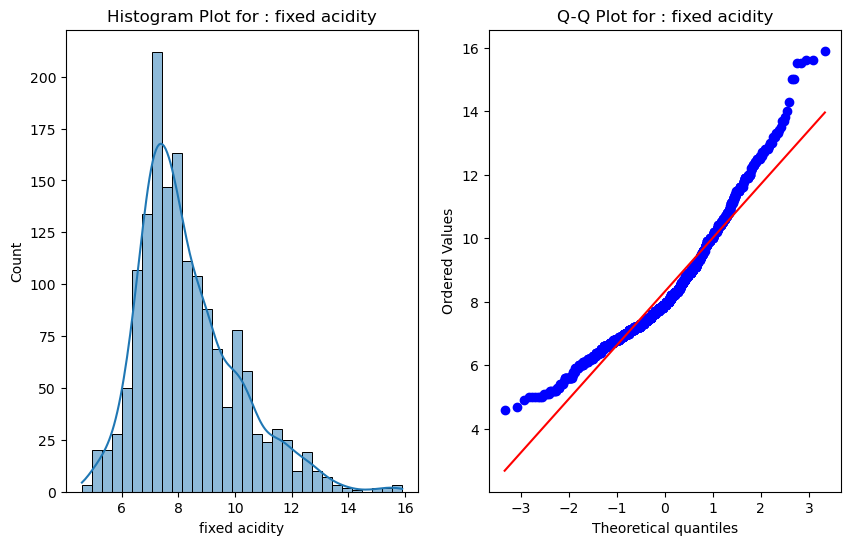



Feature : volatile acidity


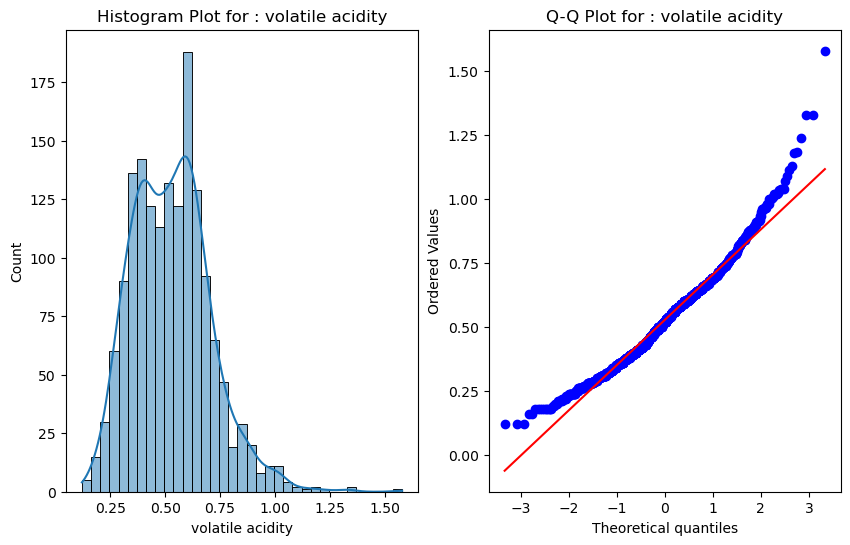



Feature : citric acid


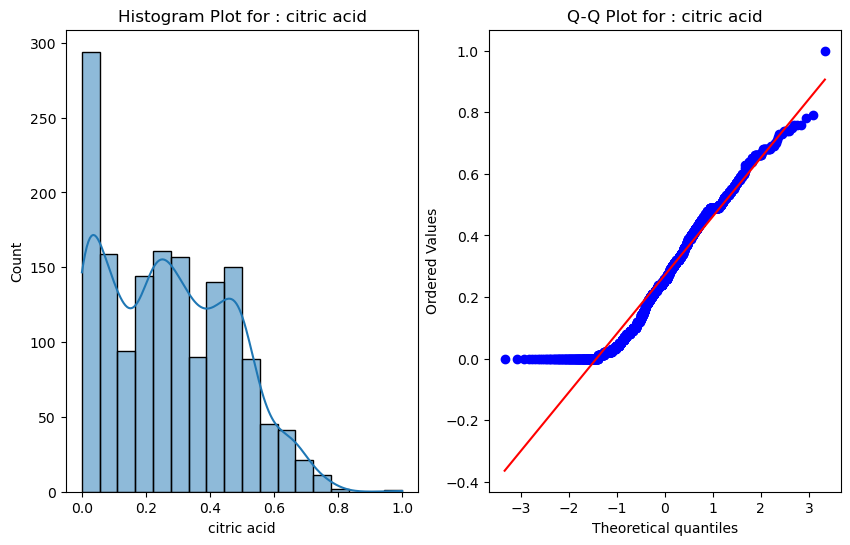



Feature : residual sugar


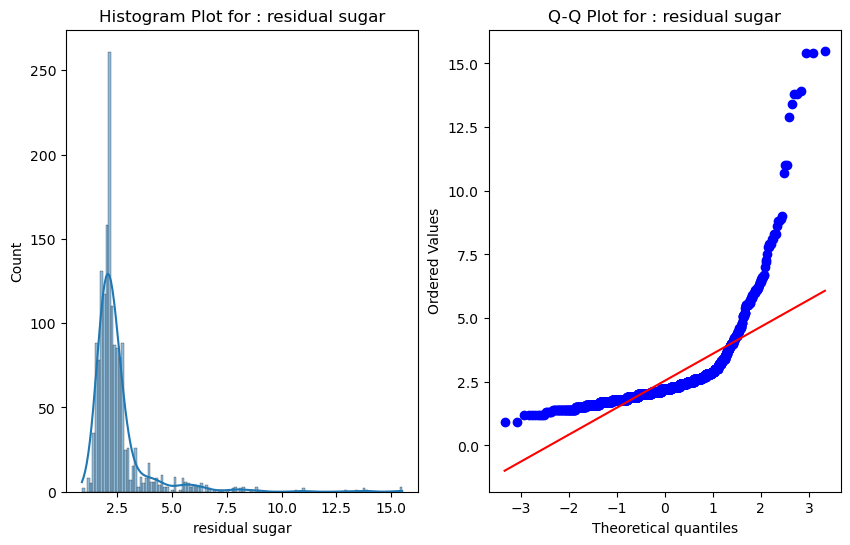



Feature : chlorides


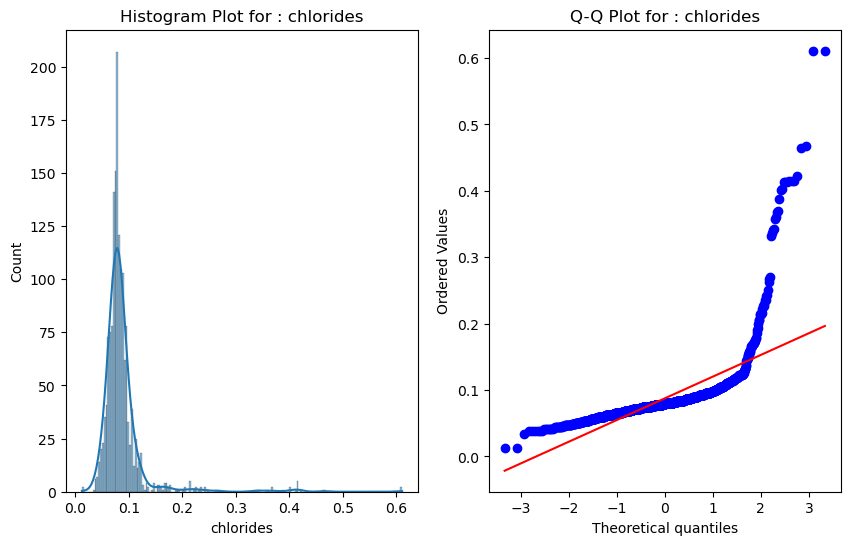



Feature : free sulfur dioxide


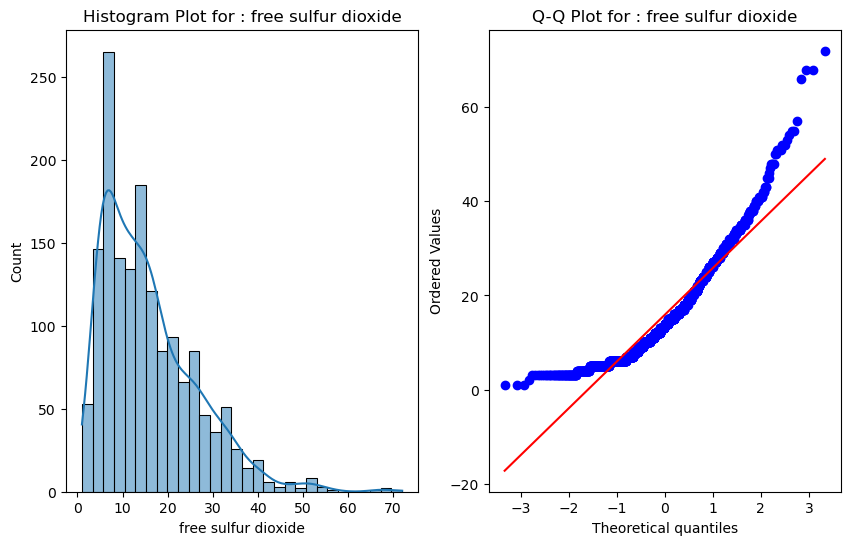



Feature : total sulfur dioxide


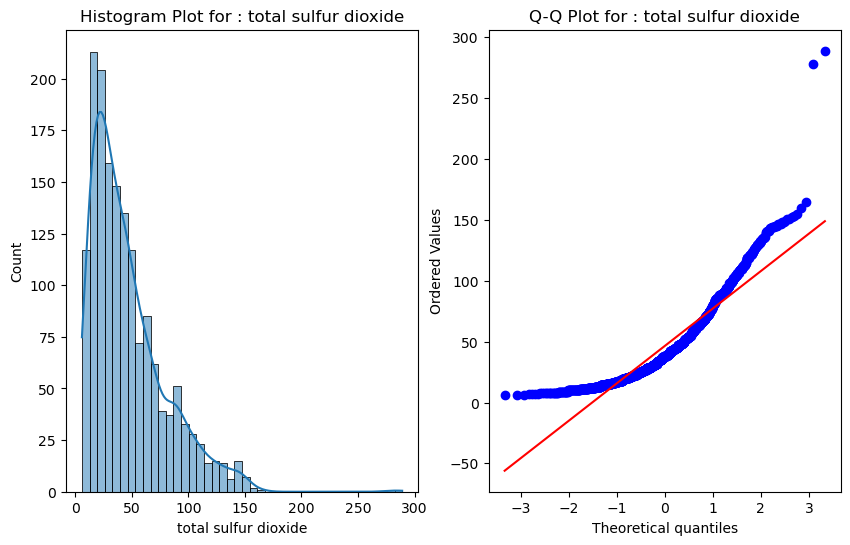



Feature : density


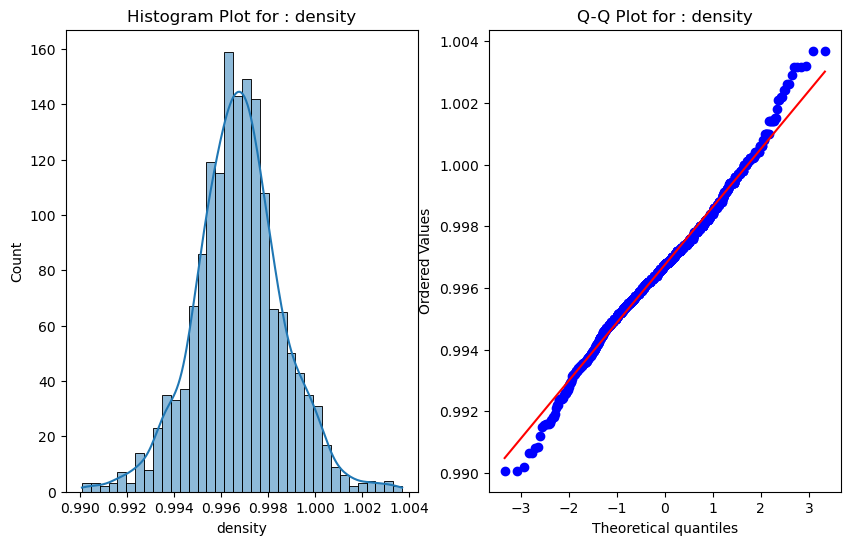



Feature : pH


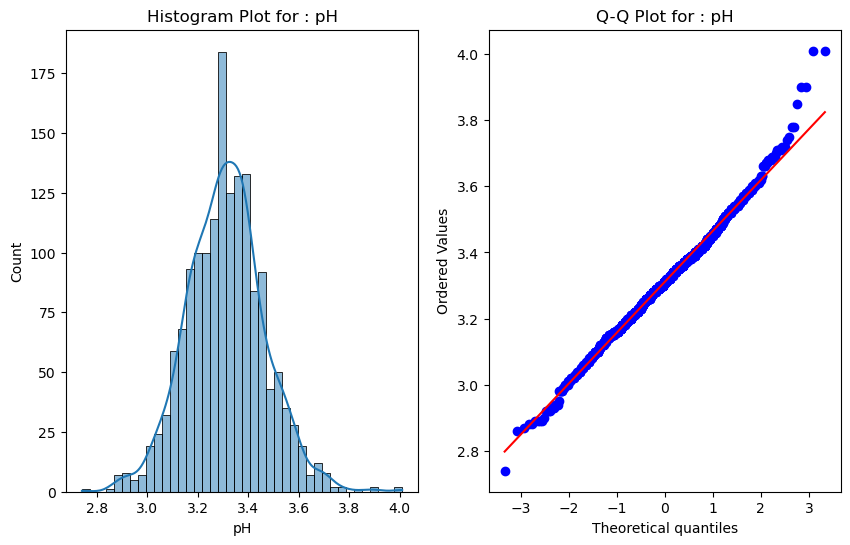



Feature : sulphates


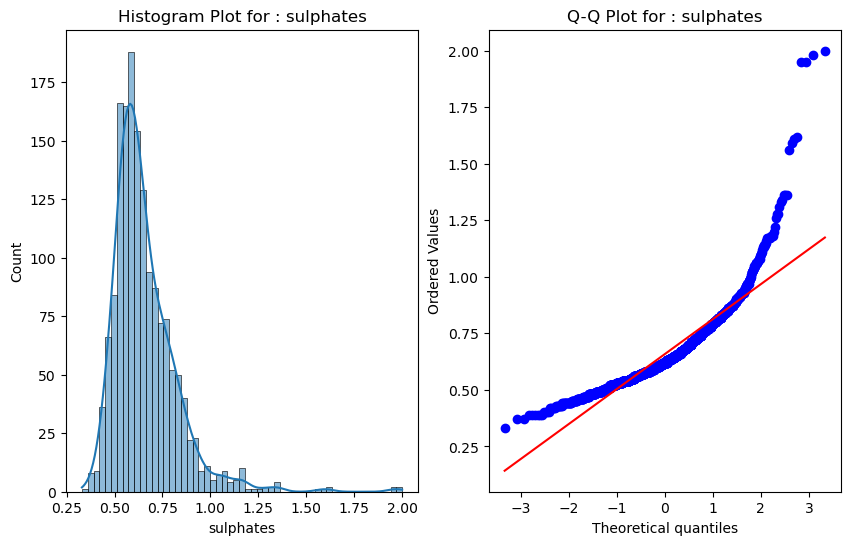



Feature : alcohol


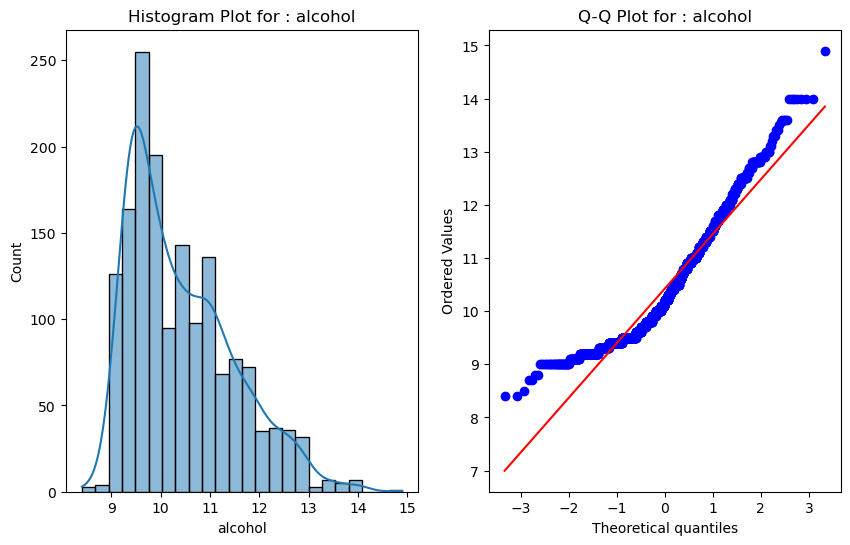



Feature : quality


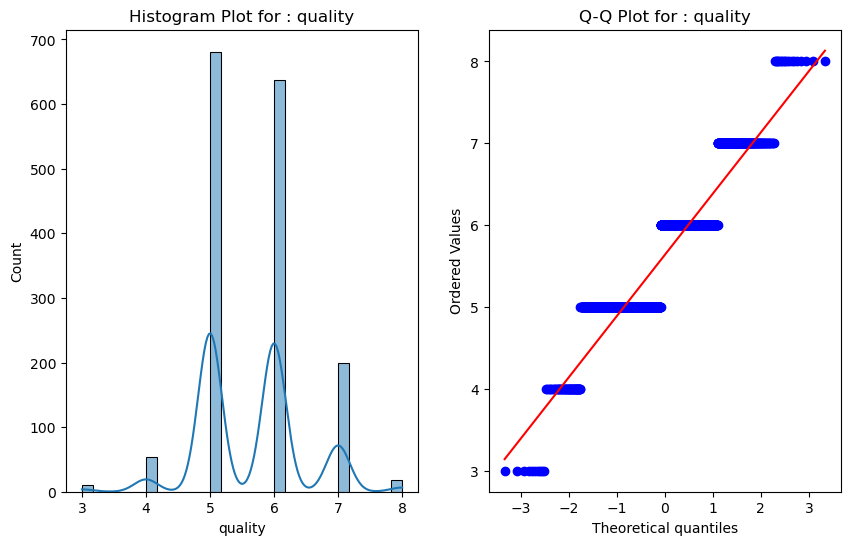

In [38]:
## Iterate QQ plot on each of variable 
for col in df.columns:
    print(f'Feature : {col}')
    qq_plot(df,col)
    print('\n'+'='*100 + '\n')

In [39]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [ ]:
### Observations : All Features look Right (Positively) Skewed Except `density`, `pH` and `quality` are Normally distributed

In [ ]:
### To improve normality, we could apply various transformations such as:

1. `Log transformation`: This could be applied to the "residual sugar" feature to reduce the skewness.

2. `Square root transformation`: This could be applied to the "density" feature to reduce the skewness.

3. `Box-Cox transformation`: This is a more general transformation that can be used to transform a variety of non-normal distributions to normality. It involves finding the optimal lambda value that maximizes the log-likelihood of the data under a Box-Cox transformation. The Scipy library in Python provides a function for calculating the Box-Cox transformation.

### It's important to note that not all non-normal distributions need to be transformed. In some cases, non-normality may not significantly impact the performance of a machine learning model, and therefore it may not be necessary to transform the data.

In [ ]:
Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
### All values are numerical in nature hence no need to perform categorical variable feature engineering

In [41]:
X = df.drop(labels=['quality'],axis=1)
Y = df[['quality']]

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=56)

In [43]:
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1190,9.1,0.40,0.57,4.6,0.080,6.0,20.0,0.99652,3.28,0.57,12.5
888,6.8,0.57,0.00,2.5,0.072,32.0,64.0,0.99491,3.43,0.56,11.2
801,8.6,0.55,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
1162,8.5,0.32,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8
591,6.6,0.39,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5


In [44]:
xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1340,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3
1068,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9
886,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4
1484,6.8,0.91,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9


In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [46]:
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.452051,-0.708266,1.531420,1.380613,-0.165298,-0.944427,-0.797894,-0.122590,-0.178691,-0.505892,1.964141
1,-0.895945,0.243574,-1.403751,-0.042357,-0.331179,1.548705,0.527948,-0.990696,0.811254,-0.564199,0.731648
2,0.159008,0.131593,-0.940303,0.499727,-0.414120,-0.752648,-0.888292,0.324943,-0.508672,-1.263886,-0.406037
3,0.100400,-1.156190,0.759006,-0.177878,-0.268974,-0.369089,-0.828026,-1.298038,-1.102639,0.310410,1.300491
4,-1.013163,-0.764256,1.119466,-0.584441,-0.372649,0.685697,3.089232,-2.451917,-1.234632,-0.914042,1.016069


In [47]:
xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.485686,-0.092369,-1.300763,-0.584441,-0.082357,-0.273199,-0.466433,-0.737274,0.349280,-0.680813,0.067998
1,0.334834,-1.324162,0.398547,-0.448920,-0.434855,0.877477,0.317018,0.136224,-0.838654,4.100380,-0.121616
2,1.624222,-1.212181,1.325443,-0.245638,-0.580001,-1.232096,-1.099221,-0.553947,-1.894595,1.010096,0.447227
3,0.393443,1.531358,-0.785820,-0.110117,-0.103092,-0.752648,-0.556832,0.869531,0.151291,-0.039434,-0.026809
4,-0.895945,2.147254,-1.094786,-0.381159,-0.580001,-1.136207,-1.069089,-0.446108,1.471218,-0.097741,0.447227


In [48]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(xtrain)
output_cols = pca.get_feature_names_out()
print(f'Output Columns : {output_cols}')
print(f'Explained Variance :{pca.explained_variance_ratio_}')

Output Columns : ['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6']
Explained Variance :[0.27374416 0.17931096 0.14120952 0.11130894 0.08661386 0.06215981
 0.05244379]


In [49]:
pca.explained_variance_ratio_.sum()

0.9067910333452673

In [50]:
# Transforming xtrain and xtest
xtrain_pca = pd.DataFrame(pca.transform(xtrain),columns=output_cols)
xtest_pca = pd.DataFrame(pca.transform(xtest),columns=output_cols)

In [51]:
xtrain_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,1.020694,-1.880895,0.748610,-1.379659,1.495645,0.920255,0.326057
1,-2.247523,0.789783,1.161026,-0.242194,-0.107337,0.285457,-0.226211
2,-0.318402,-0.285639,-1.559077,-0.970248,0.129765,0.371418,0.599004
3,0.554356,-2.087261,1.236879,-0.042476,-0.259716,0.796974,0.277023
4,-0.632994,0.445374,3.106656,-0.429668,-2.147096,2.047180,0.677805


In [52]:
xtest_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,-1.525644,-0.529696,-0.420446,0.175144,-0.351680,0.129059,0.382470
1,1.909233,-0.161556,2.127158,1.784779,-0.235729,-1.997731,-1.403574
2,2.428857,-2.433369,0.204454,-0.154795,-0.606666,0.341838,-0.225700
3,-0.306935,0.075147,-1.760211,0.050617,0.558149,0.119875,-1.101223
4,-2.510943,-0.748558,-1.557770,0.390697,0.980448,0.066785,-1.117568


In [53]:
print(f'Minimum Number of components required to explain 90% variance is {xtrain_pca.shape[1]}')

Minimum Number of components required to explain 90% variance is 7
